<a href="https://colab.research.google.com/github/sds-capstone/2022-09-proj7-women-at-table/blob/fin-eda-and-questions/financialExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
# import pipe
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.legend import Patch

In [ ]:


file = 'findex_SubSahAfrica.csv'
df = pd.read_csv(file,index_col = 0)



In [ ]:
df_fin2 = df[["fin2"]]
df_fin24 = df[["fin24"]]
df_inc = df[["inc_q"]]

In [ ]:
#np.cov(df_fin2, df_fin24)


# Financial Data Exploratory Data analysis Focusing on fin2(has access to debit card) and inc_q(income quantile)

We are focusing on these two variables because we assume they will have an impact on fin24(has access to emergency funds) more than the other financial variables. 

**Correlation Plot**

First lets create a correlation plot with all of the financial variables that arent conditionals of other questions. Are there any correlations that seem strong?

In [ ]:
df_fin = df[['inc_q','fin2','fin3','fin4','fin5','fin6','fin7','fin8','fin9','fin10',
             'fin14a','fin14b','fin14c','fin15','fin16',
             'fin17a','fin17b','fin19','fin20','fin21','fin22a','fin22b','fin22b','fin24',
             'fin25','fin26','fin28','fin30','fin32','fin37','fin38',
             'fin42','fin46','account','saved','borrowed','receive_wages','receive_pension',
             'pay_utilities','remittances','pay_onlne','pay_onlne_mobintbuy','pay_cash',
             'pay_cash_mobintbuy']]

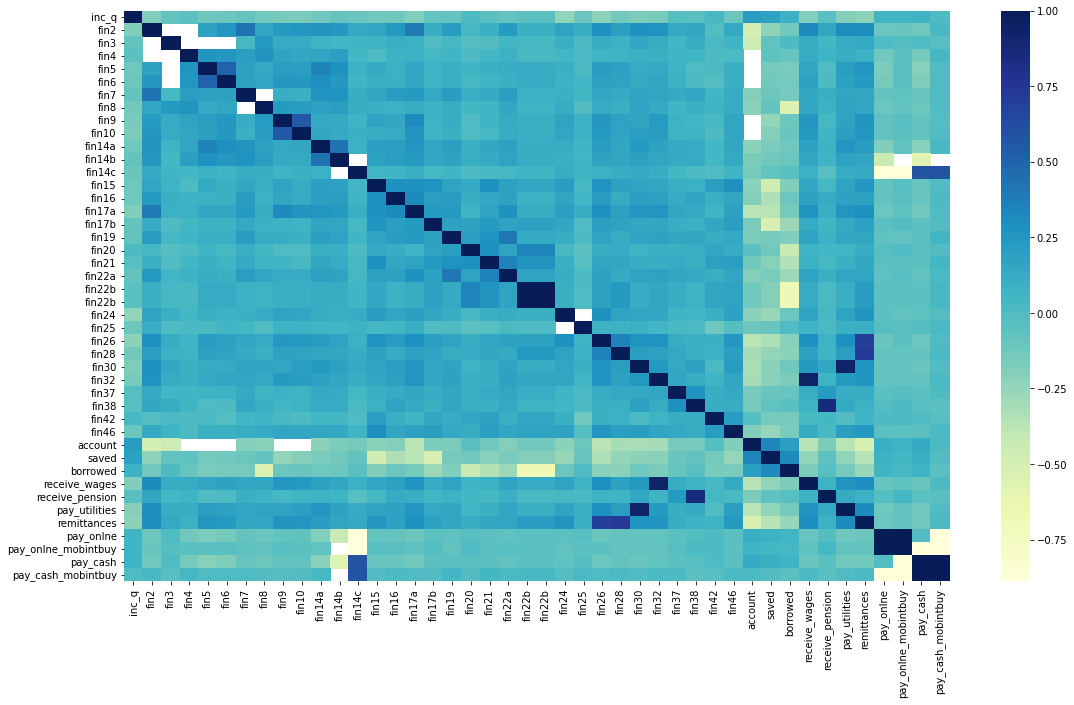

In [ ]:
fig, ax = plt.subplots()

corr = df_fin.corr()
sns.heatmap(corr, cmap="YlGnBu", xticklabels = True, yticklabels = True)
fig.set_size_inches(18.5, 10.5)

We assumed that fin2 and inc_q would have the largest correlation with fin24 however, inc_q doesnt seem to correlate with fin24. fin2 seems to have a slight correlation.Overall fin24 doesnt look like it has a strong correlation with the other financial variables, possibly remmittances. There seem to be a few stronger correlations however these are mostly from two questions being very similar. For example fin 32 seems correlated with the receive wages variable. Fin 32 is asking if the participant reveived wages in the past 12 months. This correlateion plot is misleading in that way. 

In [ ]:
df_inq_fem = df[['inc_q','female']]

In [ ]:
df_inq_fin24 = df[['inc_q','fin24']]

In [ ]:
df_inq = df['inc_q']

Lets start by looking at the income quantile variable. How is it distributed, what is the mean value, and how does it relate to access to emergency funds?

In [ ]:
df["inc_q"].mean()

3.241085714285714

Although income quantile is a categorical variable, it could still be helpful to look at the mean value because the categories represent meaningful numbers. Income quantile is separated into 5 quantiles with 1 being the poorest and 5 being the richest. The mean for all the sub sahara countries is 3.241. This means that all the countries average out to be about middle class. We will look at some individual countries later on. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 0.98, 'Income Quantiles')

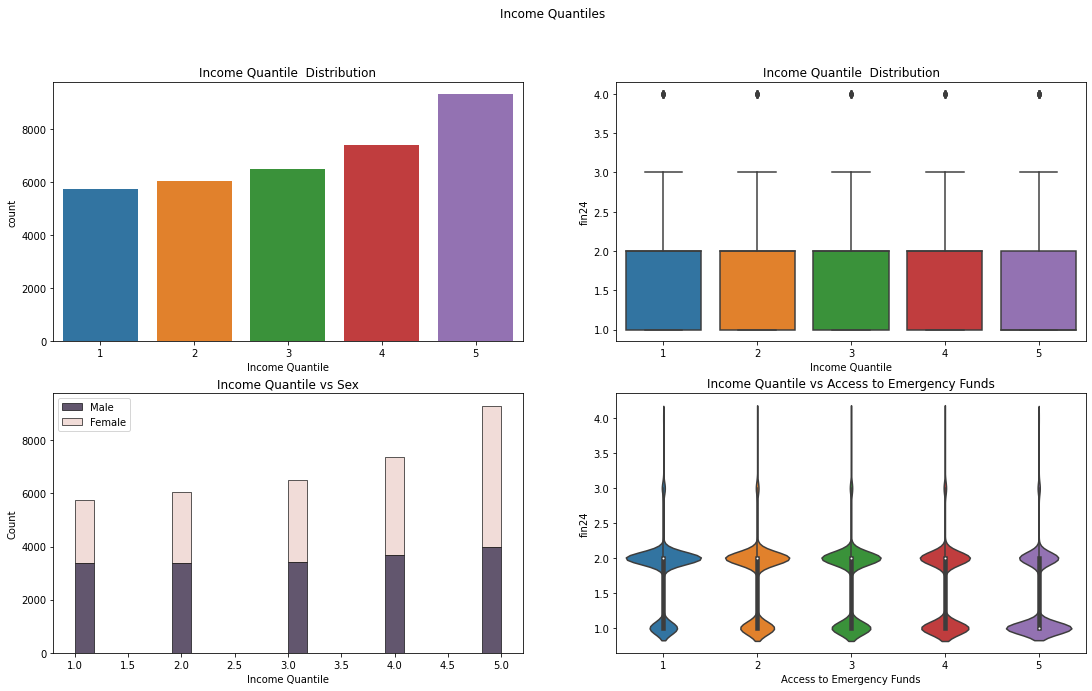

In [ ]:
#stacking plots
# create new figure
fig = plt.figure()
#add sub plot
ax1 = fig.add_subplot(2,2,1) 
#hand off to pandas
sns.countplot(df_inq,ax = ax1)
ax1.set_xlabel("Income Quantile")
ax1.title.set_text('Income Quantile  Distribution')

#the numbers determine where the subplot is placed in the figure
ax2 = fig.add_subplot(2,2,2) 
sns.boxplot(data = df_inq_fin24, x = 'inc_q', y = 'fin24', ax = ax2)
ax2.set_xlabel("Income Quantile")
ax2.title.set_text('Income Quantile  Distribution')

ax3 = fig.add_subplot(2,2,3)
sns.histplot(df_inq_fem, x="inc_q", hue="female", multiple="stack", ax = ax3)
ax3.set_xlabel("Income Quantile")
ax3.title.set_text('Income Quantile vs Sex')
plt.legend(labels=['Male', 'Female'])

ax4 = fig.add_subplot(2,2,4)
sns.violinplot(data = df_inq_fin24, x='inc_q', y='fin24', ax = ax4)
ax4.set_xlabel("Income Quantile")
ax4.set_xlabel("Access to Emergency Funds")
ax4.title.set_text('Income Quantile vs Access to Emergency Funds')

fig.set_size_inches(18.5, 10.5)
fig.suptitle("Income Quantiles")

Income quantile 5, which is the richest quantile, has the highest count of people. Males comprise the majority of this quantile. Women compose the majority of quantiles 1 and 2 which are the poorest quantiles. The majority of people in quantile 5 have more access to emergency funds while the majority of people in quantile 1 dont have access to emergency funds.

In [ ]:
df_fin2 = df[["fin2"]]

Now lets look at the fin2(access to debit card) variable. This is another categorical variable. The levels are encoded. 1: yes, 2:no, 3: dont know, 4: refused to answer. 

Text(0.5, 0.98, 'Access to Debit Card')

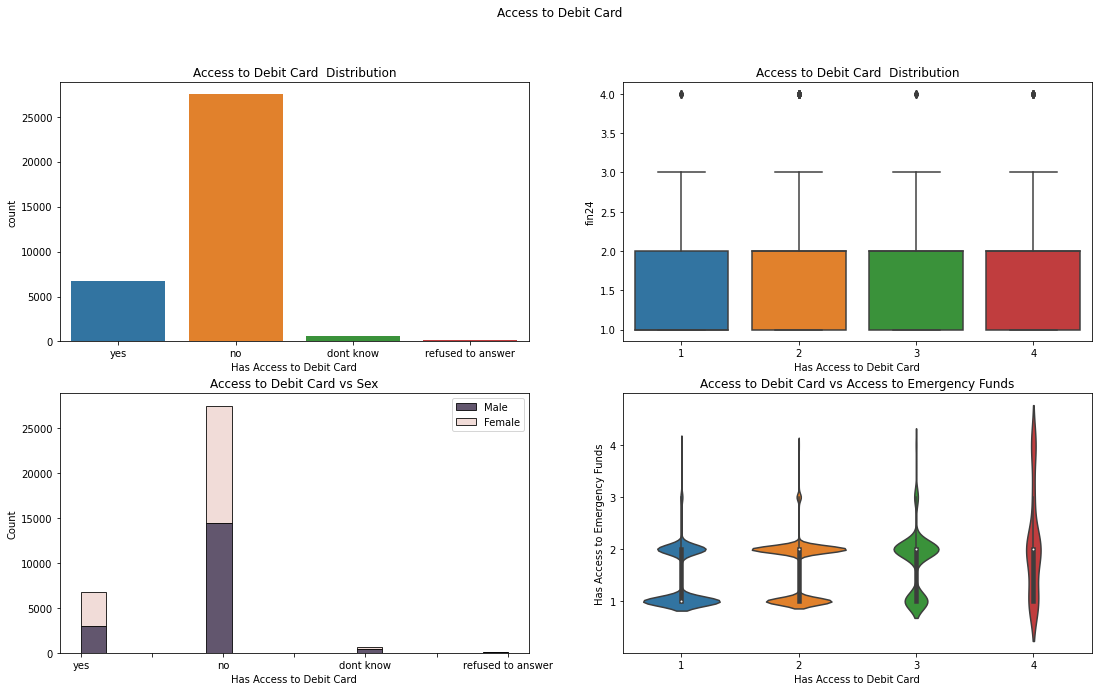

In [ ]:
#stacking plots
# create new figure
fig = plt.figure()
#add sub plot
ax1 = fig.add_subplot(2,2,1) 
#hand off to pandas
sns.countplot(data = df_fin2,x = 'fin2', ax = ax1)
ax1.title.set_text('Access to Debit Card  Distribution')
ax1.set_xticklabels(["yes","no","dont know","refused to answer"])
ax1.set_xlabel("Has Access to Debit Card")


ax2 = fig.add_subplot(2,2,2) 
sns.boxplot(data = df, x = 'fin2', y = 'fin24', ax = ax2)
ax2.set_xlabel("Has Access to Debit Card")
ax2.title.set_text('Access to Debit Card  Distribution')

ax3 = fig.add_subplot(2,2,3)
sns.histplot(df, x="fin2", hue="female", multiple="stack", ax = ax3)
plt.legend(labels=['Male', 'Female'])
ax3.set_xticklabels(["","yes","","no","", "dont know","","refused to answer"])
ax3.set_xlabel("Has Access to Debit Card")
ax3.title.set_text('Access to Debit Card vs Sex')

ax4 = fig.add_subplot(2,2,4)
sns.violinplot(data = df, x='fin2', y='fin24', ax = ax4)
ax4.set_xlabel("Has Access to Debit Card")
ax4.set_ylabel("Has Access to Emergency Funds")
ax4.title.set_text('Access to Debit Card vs Access to Emergency Funds')


fig.set_size_inches(18.5, 10.5)
fig.suptitle("Access to Debit Card")

Looking at the counts of fin2, it seems most people dont have access to a debit card. The counts of people who do and dont have access to debit cards seem to be evenly distributed between men and women. Relating to our outcome variable, people who dont have access to a debit card mostly dont have access to emergency funds. People who do have access to a debit card mostly have access to emergency funds.

In [ ]:
df3 = df[['inc_q','female','fin2','fin24','emp_in']]

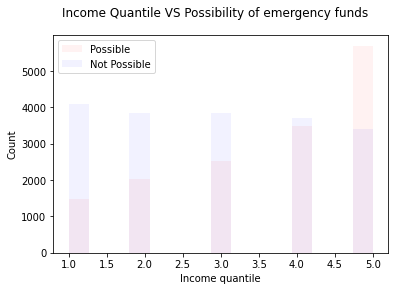

In [ ]:
fig, ax = plt.subplots()
ax.hist(df[df['fin24']==1]['inc_q'], bins = 15, alpha = .05, color = "red", label= "Possible")
ax.hist(df[df['fin24']==2]['inc_q'], bins = 15, alpha = .05, color = "blue", label= "Not Possible")

ax.set_xlabel("Income quantile")
ax.set_ylabel("Count")

fig.suptitle("Income Quantile VS Possibility of emergency funds")

ax.legend()

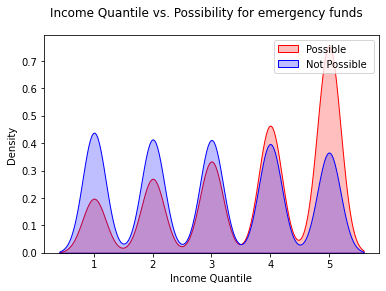

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["fin24"]==1]["inc_q"], shade =True, color ="red", label = "Possible", ax = ax)
sns.kdeplot(df[df["fin24"]==2]["inc_q"], shade =True, color ="blue", label = "Not Possible ", ax = ax)

ax.set_xlabel("Income Quantile")
ax.set_ylabel("Density")

fig.suptitle("Income Quantile vs. Possibility for emergency funds")

ax.legend()

While some people in lower income quantiles do have access to emergency funds, only quantiles 4 and 5 have more people that have access to emergency funds than people who dont. 

In [ ]:
counts_df = df.groupby(["fin24","inc_q"])['wpid_random'].count().unstack()
counts_df

inc_q,1,2,3,4,5
fin24,,,,,
1,1490,2037,2515,3500,5695
2,4081,3852,3832,3696,3406
3,163,159,151,179,185
4,12,11,10,10,16


In [ ]:
inc_q_percents_df = counts_df.div(counts_df.sum()).T
inc_q_percents_df

fin24,1,2,3,4
inc_q,,,,
1,0.259311,0.710233,0.028368,0.002088
2,0.336194,0.635748,0.026242,0.001815
3,0.386447,0.588814,0.023202,0.001537
4,0.473934,0.500474,0.024238,0.001354
5,0.612234,0.366158,0.019888,0.001720


Text(0.5, 0.98, 'Income Quantile vs. Possibility for emergency funds')

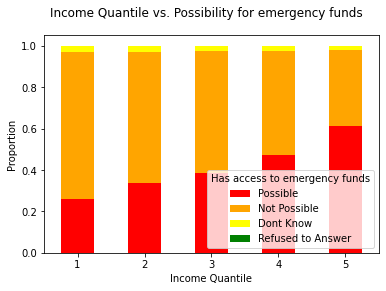

In [ ]:
fig, ax = plt.subplots()
inc_q_percents_df.plot(kind = "bar", stacked = True, color = ["red", "orange", "yellow", "green", "blue"], ax = ax)
ax.legend(["Possible","Not Possible","Dont Know","Refused to Answer"],title = "Has access to emergency funds")

ax.set_ylabel("Proportion")
ax.set_xlabel("Income Quantile")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

fig.suptitle("Income Quantile vs. Possibility for emergency funds")




Comparing income quantiles and access to emergency funds we can see that people in higher quantiles have more access to emergency funds than people in lower income quantiles.

In [ ]:
counts_fin2_df = df.groupby(["fin24","fin2"])['wpid_random'].count().unstack()
counts_fin2_df

fin2,1,2,3,4
fin24,,,,
1,4073,10923,205,36
2,2563,15845,405,54
3,99,696,33,9
4,8,28,6,17


In [ ]:
fin2_percents_df = counts_fin2_df.div(counts_fin2_df.sum()).T
fin2_percents_df

fin24,1,2,3,4
fin2,,,,
1,0.604034,0.380098,0.014682,0.001186
2,0.397316,0.576349,0.025316,0.001018
3,0.315871,0.624037,0.050847,0.009245
4,0.310345,0.465517,0.077586,0.146552


Text(0.5, 0.98, 'Has Debit Card vs. Possibility for Emergency Funds')

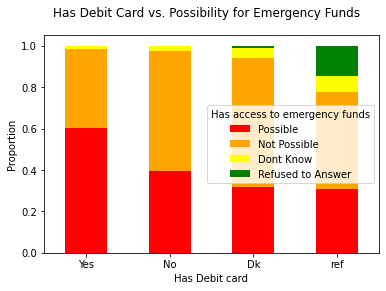

In [ ]:
fig, ax = plt.subplots()
fin2_percents_df.plot(kind = "bar", stacked = True, color = ["red", "orange", "yellow", "green", "blue"], ax = ax)
ax.legend(["Possible","Not Possible","Dont Know","Refused to Answer"],title = "Has access to emergency funds")
ax.set_xticklabels(["Yes", "No","Dk", "ref"], rotation=0)
ax.set_ylabel("Proportion")
ax.set_xlabel("Has Debit card")
fig.suptitle("Has Debit Card vs. Possibility for Emergency Funds")

More than half the people who own debit cards have access to emergency funds while less than half of people who dont own credit cards, dont know, or refused to answer, have access to emergency funds. 

In [ ]:
df_fin2_4 = df[["fin2","fin4"]]

In [ ]:
#df_fin2.groupby(["fin2"]).describe()

In [ ]:
df_econ1 = df[["economy","inc_q"]]

In [ ]:
df_fin2 = df[["fin24","fin2"]]

In [ ]:
df_fin2_4.describe()

,fin2,fin4
count,35000.000000,6134.000000
mean,1.832514,1.546462
std,0.443183,0.508249
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,4.000000,4.000000


fin4 represents the question "In the PAST 12 MONTHS, have you used your OWN [local terminology for ATM/debit card] DIRECTLY to make a purchase?" Only asked to people who own a debit card. With 2 meaning no and 1 meaning yes, the means for fin2 and fin4 suggest that most people dont own debit cards and the people who do own debit cards havent used them in the past year. 

Does the country have an impact on income quantile, access to debit card, and access to emergency funds. What countries have the richest population on average?

In [ ]:


#df_inc_1_2 = df.loc[(df["fin2"] == "1" or df["fin2"] == "2") and (df["fin24"] == 1 or df["fin24"] == 2)]

In [ ]:
df_econ = df[["economy","inc_q","fin2","fin24"]]

In [ ]:
df_econ.groupby("economy").describe()

inc_q                                            \
                           count   mean       std  min  25%  50%  75%  max   
economy                                                                      
Benin                     1000.0  3.271  1.421119  1.0  2.0  3.0  5.0  5.0   
Botswana                  1000.0  3.192  1.423082  1.0  2.0  3.0  5.0  5.0   
Burkina Faso              1000.0  3.373  1.436640  1.0  2.0  4.0  5.0  5.0   
Cameroon                  1000.0  3.249  1.403199  1.0  2.0  3.0  5.0  5.0   
Central African Republic  1000.0  3.221  1.420626  1.0  2.0  3.0  5.0  5.0   
Chad                      1000.0  3.266  1.454428  1.0  2.0  3.0  5.0  5.0   
Congo, Dem. Rep.          1000.0  3.295  1.400692  1.0  2.0  3.0  5.0  5.0   
Congo, Rep.               1000.0  3.213  1.445587  1.0  2.0  3.0  5.0  5.0   
Cote d'Ivoire             1000.0  3.248  1.431274  1.0  2.0  3.0  5.0  5.0   
Ethiopia                  1000.0  3.355  1.438417  1.0  2.0  4.0  5.0  5.0   
Gabon                     1000.0  3.362  1.411718  1.0  2.0  4.0  5.0  5.0   
Ghana                     1000.0  3.256  1.451403  1.0  2.0  3.0  5.0  5.0   
Guinea                    1000.0  3.267  1.435190  1.0  2.0  3.0  5.0  5.0   
Kenya                     1000.0  3.205  1.390291  1.0  2.0  3.0  4.0  5.0   
Lesotho                   1000.0  3.171  1.435904  1.0  2.0  3.0  4.0  5.0   
Liberia                   1000.0  3.071  1.419145  1.0  2.0  3.0  4.0  5.0   
Madagascar                1000.0  3.268  1.432560  1.0  2.0  3.0  5.0  5.0   
Malawi                    1000.0  3.152  1.412406  1.0  2.0  3.0  4.0  5.0   
Mali                      1000.0  3.263  1.422623  1.0  2.0  3.0  5.0  5.0   
Mauritania                1000.0  3.309  1.421105  1.0  2.0  3.0  5.0  5.0   
Mauritius                 1000.0  3.291  1.439580  1.0  2.0  4.0  5.0  5.0   
Mozambique                1000.0  3.311  1.424187  1.0  2.0  4.0  5.0  5.0   
Namibia                   1000.0  3.149  1.425774  1.0  2.0  3.0  4.0  5.0   
Niger                     1000.0  3.273  1.455538  1.0  2.0  3.0  5.0  5.0   
Nigeria                   1000.0  3.359  1.415671  1.0  2.0  4.0  5.0  5.0   
Rwanda                    1000.0  3.066  1.458002  1.0  2.0  3.0  4.0  5.0   
Senegal                   1000.0  3.257  1.431433  1.0  2.0  3.0  5.0  5.0   
Sierra Leone              1000.0  3.213  1.440036  1.0  2.0  3.0  5.0  5.0   
South Africa              1000.0  3.279  1.418863  1.0  2.0  3.0  5.0  5.0   
South Sudan               1000.0  3.061  1.432945  1.0  2.0  3.0  4.0  5.0   
Tanzania                  1000.0  3.220  1.428860  1.0  2.0  3.0  5.0  5.0   
Togo                      1000.0  3.324  1.408903  1.0  2.0  4.0  5.0  5.0   
Uganda                    1000.0  3.218  1.426363  1.0  2.0  3.0  5.0  5.0   
Zambia                    1000.0  3.226  1.452251  1.0  2.0  3.0  5.0  5.0   
Zimbabwe                  1000.0  3.184  1.442992  1.0  2.0  3.0  5.0  5.0   

                            fin2         ...             fin24         \
                           count   mean  ...  75%  max   count   mean   
economy                                  ...                            
Benin                     1000.0  1.886  ...  2.0  3.0  1000.0  1.604   
Botswana                  1000.0  1.695  ...  2.0  3.0  1000.0  1.783   
Burkina Faso              1000.0  1.844  ...  2.0  4.0  1000.0  1.434   
Cameroon                  1000.0  1.888  ...  2.0  4.0  1000.0  1.564   
Central African Republic  1000.0  2.004  ...  2.0  3.0  1000.0  1.703   
Chad                      1000.0  2.009  ...  2.0  4.0  1000.0  1.596   
Congo, Dem. Rep.          1000.0  1.930  ...  2.0  4.0  1000.0  1.517   
Congo, Rep.               1000.0  1.878  ...  2.0  4.0  1000.0  1.711   
Cote d'Ivoire             1000.0  1.905  ...  2.0  4.0  1000.0  1.499   
Ethiopia                  1000.0  2.003  ...  2.0  3.0  1000.0  1.378   
Gabon                     1000.0  1.773  ...  2.0  4.0  1000.0  1.722   
Ghana                     1000.0  1.837 

Looking at the descriptive statistics for the countries, we can see that Gabon has the highest mean income quantile(3.362) and  South Sudan has the lowest(3.061). Lets look at their distributions.

In [ ]:
df_econ_gabon = df[(df.economy == "Gabon")]

Text(0.5, 0.98, 'Count of Income Quantile in Gabon')

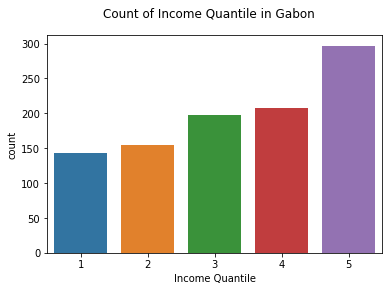

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data = df_econ_gabon, x = "inc_q", ax = ax)
ax.set_xlabel("Income Quantile")
fig.suptitle("Count of Income Quantile in Gabon")

In [ ]:
df_econ_ss = df[(df.economy == "South Sudan")]

(0.0, 300.0)

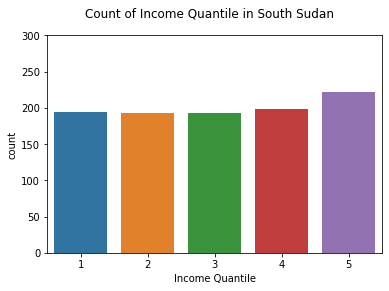

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data = df_econ_ss, x = "inc_q", ax = ax)
ax.set_xlabel("Income Quantile")
fig.suptitle("Count of Income Quantile in South Sudan")
ax.set_ylim(0, 300)

Both the distributions follow the overall distribution for all of the countries combined. They are both left skewed. The distribution in Gabon is far more left skewed than the distribution of South Sudan. South Sudan has a pretty equal distribution for all of the income quantiles. 

# Questions to Ask & Additional Questions - Step 3 (Part A)#3

* Does the dataset identify any subpopulations (e.g., 
by age, gender)?

Yes, the data set can be separated by sex and economy.


* If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset.

The variable female distingishes sex. 1 represents male, 2 represents female. There are 71330 males in this datset and 83593 females 

The economy variable separates respondants by what country they live in. There are 35 different countries with around 1000 respondants from each. Some countries have less and some countries have more. Morocco has 5000, india has 3000, Trinidad and Tobago have 504, china has 3627, and Russian Federation has 2000. 

**Additional questions:**
* Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset?





* If so, please describe how.
Are there any errors, sources of noise, or redundancies in the dataset?
* Is any information missing from individual instances?
* If so, please provide a description, explaining why this information is missing (e.g., because it was unavailable).
* Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?